# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
df_white=pd.read_csv('data/winequality-white.csv', sep=';')
df_red=pd.read_csv('data/winequality-red.csv', sep=';')

# Analysis

In [3]:
df_red.shape

(1599, 13)

In [4]:
df_white.shape

(4898, 12)

In [5]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.635795,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807771,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,NaN


In [6]:
df_red = df_red.drop('Unnamed: 12', axis=1)

In [7]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# checking out any missing value

In [8]:
df_red.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Concatenating both datasets together on their type 0(white) and 1(red)

In [10]:
df_red['type'] = '1'
df_white['type'] = '0'

In [11]:
df = pd.concat([df_red, df_white], axis=0)

# Visualization

In [12]:
#show all type of winery
df['type'].unique()

array(['1', '0'], dtype=object)

In [13]:
#column data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
type                     object
dtype: object

In [14]:
#convert suplhates to float
df['sulphates'] = df['sulphates'].astype(float)

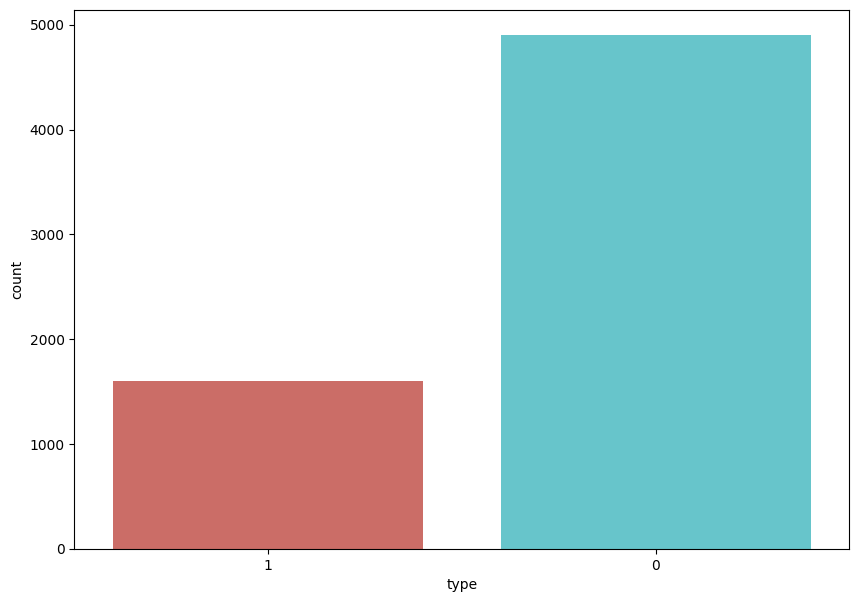

In [15]:
# plot histogram of type
plt.figure(figsize=(10,7))
sns.countplot(x='type', data=df, palette='hls')
plt.show()

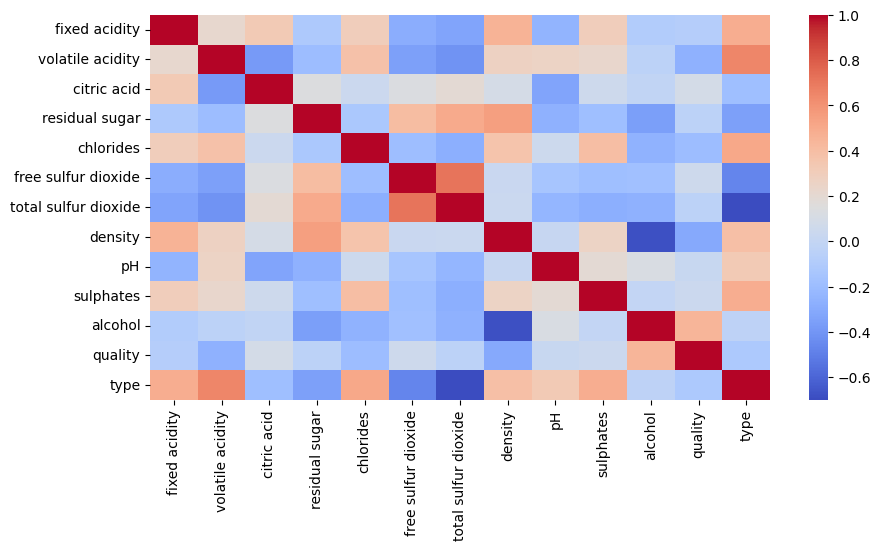

In [16]:
# correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

<Axes: xlabel='quality', ylabel='count'>

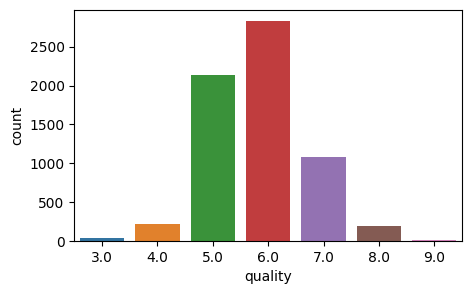

In [17]:
#ploting countplot quality 
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=df)

In [18]:
#converting categorical to numerical
df['type']=pd.get_dummies(df['type'],drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,True


# Train Model (CLASSIFICATION)

In [19]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality',axis=1))

StandardScaler()

In [20]:
# start with modelling
# split data into train and test
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
y_train.isnull().sum()

1

In [22]:
#fill null values with 0
y_train.fillna(0,inplace=True)

In [23]:
#svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm=svm.score(X_test,y_test)

In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf=rf.score(X_test,y_test)

In [25]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn=knn.score(X_test,y_test)

In [26]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt=dt.score(X_test,y_test)

In [27]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

In [28]:
models_classification = pd.DataFrame({
    'Model': ['KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [knn,svm,rf,nb,dt]})

In [29]:
# show all the models 
models_classification.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.681538
4,Decision Tree,0.620513
0,KNN,0.480000
1,SVM,0.454872
3,Naive Bayes,0.422051


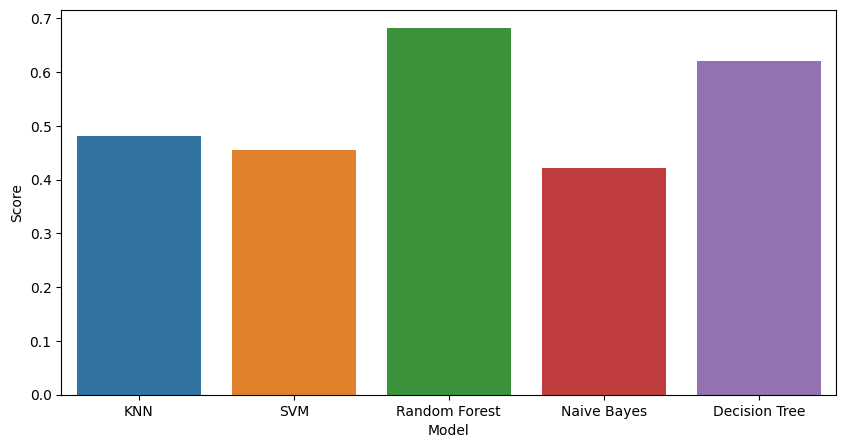

In [30]:
#plotting the graph 
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Score',data=models_classification)
plt.show()

# Train model (REGRESSION)

In [31]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
#acurracy
lr=1- lr.score(X_test,y_test)

In [32]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, rfr)

In [33]:
#support vector regressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
svr = svr.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, svr)

In [34]:
#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, ridge)

In [35]:
#lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso)

In [36]:
models_regression = pd.DataFrame({
    'Model': ['Linear-R', 'RandomForest-R', 'SVR', 'Ridge', 'Lasso'],
              'Error': [lr,mse_rfr,mse_svr,mse_ridge,mse_lasso]})

In [37]:
# show all the models 
models_regression.sort_values(by='Error', ascending=True)

,Model,Error
1,RandomForest-R,0.375217
2,SVR,0.468222
3,Ridge,0.535102
0,Linear-R,0.710367
4,Lasso,0.737879


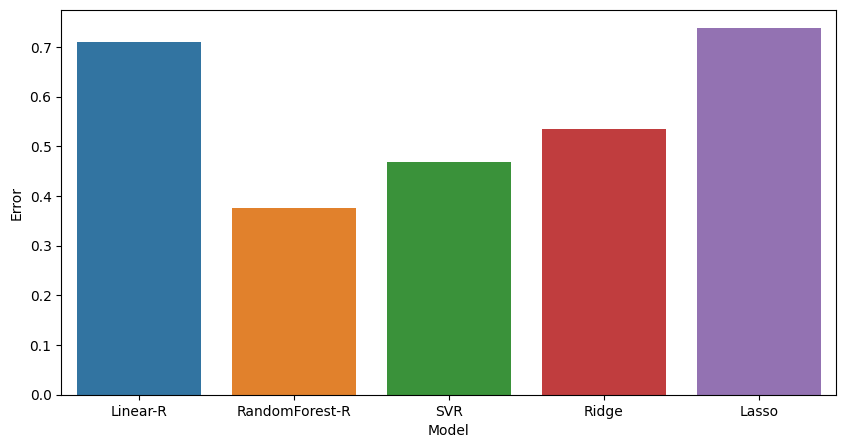

In [38]:
#plotting the graph 
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Error',data=models_regression)
plt.show()